In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore', category=FutureWarning)

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'
sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
anndata = sc.read('/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/anndataNucA11') # reset original anndata
# delete anndata
del sdata.table
# create anndata
sdata.table = anndata
sdata

SpatialData object with:
├── Images
│     ├── 'clahe': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'raw_image': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'tiling_correction': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'tophat_filtered': SpatialImage[cyx] (1, 12864, 10720)
│     └── 'transcript_density': SpatialImage[cyx] (1, 12864, 10720)
├── Labels
│     └── 'segmentation_mask': SpatialImage[yx] (12864, 10720)
├── Points
│     └── 'transcripts': DataFrame with shape: (4754932, 3) (2D points)
├── Shapes
│     ├── 'expanded_cells20': GeoDataFrame shape: (11228, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_low_counts': GeoDataFrame shape: (367, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_segmentation': GeoDataFrame shape: (50, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_size': GeoDataFrame shape: (280, 1) (2D shapes)
│     ├── 'filtered_segmentation_mask_boundaries_low_counts': GeoDataFrame shape: (367, 1) (2D shapes)
│     ├── 'filtered_segmentation_mask_

In [3]:
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"
marker_genes = pd.read_csv(path_mg, sep=',', index_col=0)
cell_types = marker_genes.columns 
postfix = ['_Hep','_LSEC','_End','_Cho','_Kup','_Ste','_Fib','_B','_Oth']
post = dict(zip(cell_types, postfix))

In [4]:
marker_genes

,Hepatocytes,LSECs,Endothelial cells,Cholangiocytes,Kupffer cells,Stellate cells,Fibroblasts,B cells,Other
Column1,,,,,,,,,
Acta2,0,0,0,0,0,0,1,0,1
Adamtsl2,0,0,0,0,0,1,1,0,0
Adgre1,0,0,0,0,1,0,0,0,1
Adgrg6,0,1,1,0,0,0,0,0,0
Atp6v0d2,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
Vwf,0,0,1,0,0,0,0,0,0
Wnt2,0,1,1,0,0,0,0,0,0
Wnt9b,0,1,1,0,0,0,0,0,0


In [5]:
all_genes = sdata.table.var.index 
# if index of marker genes not in all_genes add row to marker_genes 
for gene in all_genes:
    if gene not in marker_genes.index:
        marker_genes.loc[gene] = [0]*len(marker_genes.columns)  
marker_genes.sort_index(inplace=True) 
marker_genes

,Hepatocytes,LSECs,Endothelial cells,Cholangiocytes,Kupffer cells,Stellate cells,Fibroblasts,B cells,Other
Column1,,,,,,,,,
Acta2,0,0,0,0,0,0,1,0,1
Adamtsl2,0,0,0,0,0,1,1,0,0
Adgre1,0,0,0,0,1,0,0,0,1
Adgrg6,0,1,1,0,0,0,0,0,0
Atp6v0d2,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
Vwf,0,0,1,0,0,0,0,0,0
Wnt2,0,1,1,0,0,0,0,0,0
Wnt9b,0,1,1,0,0,0,0,0,0


In [6]:
sdata.table.var = sdata.table.var.join(marker_genes)
sdata.table.var


,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,mean,std,Hepatocytes,LSECs,Endothelial cells,Cholangiocytes,Kupffer cells,Stellate cells,Fibroblasts,B cells,Other
gene,,,,,,,,,,,,,,,,,,
Acta2,317,0.382063,0.323577,97.330526,4537,8.420242,309,0.010009,0.087445,0,0,0,0,0,0,1,0,1
Adamtsl2,515,0.146695,0.136884,95.663158,1742,7.463363,514,0.005403,0.035190,0,0,0,0,0,1,1,0,0
Adgre1,809,0.167326,0.154716,93.187368,1987,7.594884,804,0.006263,0.029543,0,0,0,0,1,0,0,0,1
Adgrg6,367,0.070484,0.068111,96.909474,837,6.731018,364,0.002527,0.018310,0,1,1,0,0,0,0,0,0
Atp6v0d2,661,0.063074,0.061164,94.433684,749,6.620073,661,0.002155,0.011087,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vwf,500,0.381389,0.323090,95.789474,4529,8.418477,483,0.011748,0.074048,0,0,1,0,0,0,0,0,0
Wnt2,544,0.069474,0.067167,95.418947,825,6.716595,540,0.002752,0.015097,0,1,1,0,0,0,0,0,0
Wnt9b,119,0.021389,0.021164,98.997895,254,5.541264,118,0.000865,0.011482,0,1,1,0,0,0,0,0,0


In [7]:
sdata.table.var.sort_values(cell_types.to_list(),ascending=False,inplace=True)
sdata.table.var
len(sdata.table.var.columns)
len(cell_types)
sdata.table.var

,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,mean,std,Hepatocytes,LSECs,Endothelial cells,Cholangiocytes,Kupffer cells,Stellate cells,Fibroblasts,B cells,Other
gene,,,,,,,,,,,,,,,,,,
Prox1,7538,2.249853,1.178610,36.522105,26717,10.193093,7518,0.068455,0.073062,1,0,1,1,0,0,0,0,0
Fn1,10607,15.209263,2.785583,10.677895,180610,12.104101,10495,0.387335,0.275390,1,0,0,1,0,1,1,0,1
Cyp2e1,6402,30.295579,3.443477,46.088421,359760,12.793195,6315,0.490327,0.601705,1,0,0,0,0,0,0,0,0
Ghr,9668,3.994526,1.608343,18.585263,47435,10.767137,9615,0.126050,0.101474,1,0,0,0,0,0,0,0,0
Gls2,5160,0.915537,0.649998,56.547368,10872,9.294038,5148,0.032781,0.050758,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cd14,9,0.000758,0.000758,99.924211,9,2.302585,9,0.000033,0.001202,0,0,0,0,0,0,0,0,0
Gdf15,5576,0.855242,0.618015,53.044211,10156,9.225918,5550,0.028073,0.040834,0,0,0,0,0,0,0,0,0
Mmp12,2342,0.260800,0.231746,80.277895,3097,8.038512,2337,0.008729,0.021070,0,0,0,0,0,0,0,0,0


In [8]:
# sum of values in columns 0 through 8 in each row of marker_genes
print(len)
sdata.table.var['sum'] = sdata.table.var.iloc[:,len(sdata.table.var.columns)-len(cell_types):len(sdata.table.var.columns)].sum(axis=1)


<built-in function len>


In [9]:
sdata.table.var 

,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,mean,std,Hepatocytes,LSECs,Endothelial cells,Cholangiocytes,Kupffer cells,Stellate cells,Fibroblasts,B cells,Other,sum
gene,,,,,,,,,,,,,,,,,,,
Prox1,7538,2.249853,1.178610,36.522105,26717,10.193093,7518,0.068455,0.073062,1,0,1,1,0,0,0,0,0,3
Fn1,10607,15.209263,2.785583,10.677895,180610,12.104101,10495,0.387335,0.275390,1,0,0,1,0,1,1,0,1,5
Cyp2e1,6402,30.295579,3.443477,46.088421,359760,12.793195,6315,0.490327,0.601705,1,0,0,0,0,0,0,0,0,1
Ghr,9668,3.994526,1.608343,18.585263,47435,10.767137,9615,0.126050,0.101474,1,0,0,0,0,0,0,0,0,1
Gls2,5160,0.915537,0.649998,56.547368,10872,9.294038,5148,0.032781,0.050758,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cd14,9,0.000758,0.000758,99.924211,9,2.302585,9,0.000033,0.001202,0,0,0,0,0,0,0,0,0,0
Gdf15,5576,0.855242,0.618015,53.044211,10156,9.225918,5550,0.028073,0.040834,0,0,0,0,0,0,0,0,0,0
Mmp12,2342,0.260800,0.231746,80.277895,3097,8.038512,2337,0.008729,0.021070,0,0,0,0,0,0,0,0,0,0


In [10]:
# select index with sum > 0
useful_markers = sdata.table.var[sdata.table.var['sum'] > 0].index

In [11]:
# get integer index with 'Hepatocytes' == 1
a = np.where(sdata.table.var['Stellate cells']==1)[0]
print(a)
def ranges(nums):
    nums = sorted(set(nums))
    gaps = [[s, e] for s, e in zip(nums, nums[1:]) if s+1 < e]
    edges = iter(nums[:1] + sum(gaps, []) + nums[-1:])
    return list(zip(edges, edges))
ranges(a)


[ 1 22 45 46 47 48 49 50 51 52 53 54 55 56 57 58]


[(1, 1), (22, 22), (45, 58)]

In [12]:
group_positions = []
group_labels = []
for cell_type in cell_types:
    intervals = ranges(np.where(sdata.table.var[cell_type]==1)[0])
    for i in intervals:
        group_positions.append(i)
        group_labels.append(cell_type)
print(group_positions)
group_labels



[(0, 9), (10, 20), (0, 0), (10, 14), (21, 25), (0, 1), (21, 21), (26, 29), (15, 15), (30, 44), (1, 1), (22, 22), (45, 58), (1, 1), (26, 26), (45, 53), (59, 68), (69, 72), (1, 1), (15, 15), (21, 21), (26, 27), (30, 36), (45, 48), (54, 54), (59, 62), (69, 70), (73, 92)]


['Hepatocytes',
 'LSECs',
 'Endothelial cells',
 'Endothelial cells',
 'Endothelial cells',
 'Cholangiocytes',
 'Cholangiocytes',
 'Cholangiocytes',
 'Kupffer cells',
 'Kupffer cells',
 'Stellate cells',
 'Stellate cells',
 'Stellate cells',
 'Fibroblasts',
 'Fibroblasts',
 'Fibroblasts',
 'Fibroblasts',
 'B cells',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other']

categories: 0, 1, 2, etc.
var_group_labels: Hepatocytes, LSECs, Endothelial cells, etc.


/home/wout/mambaforge/envs/napari-sparrow/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


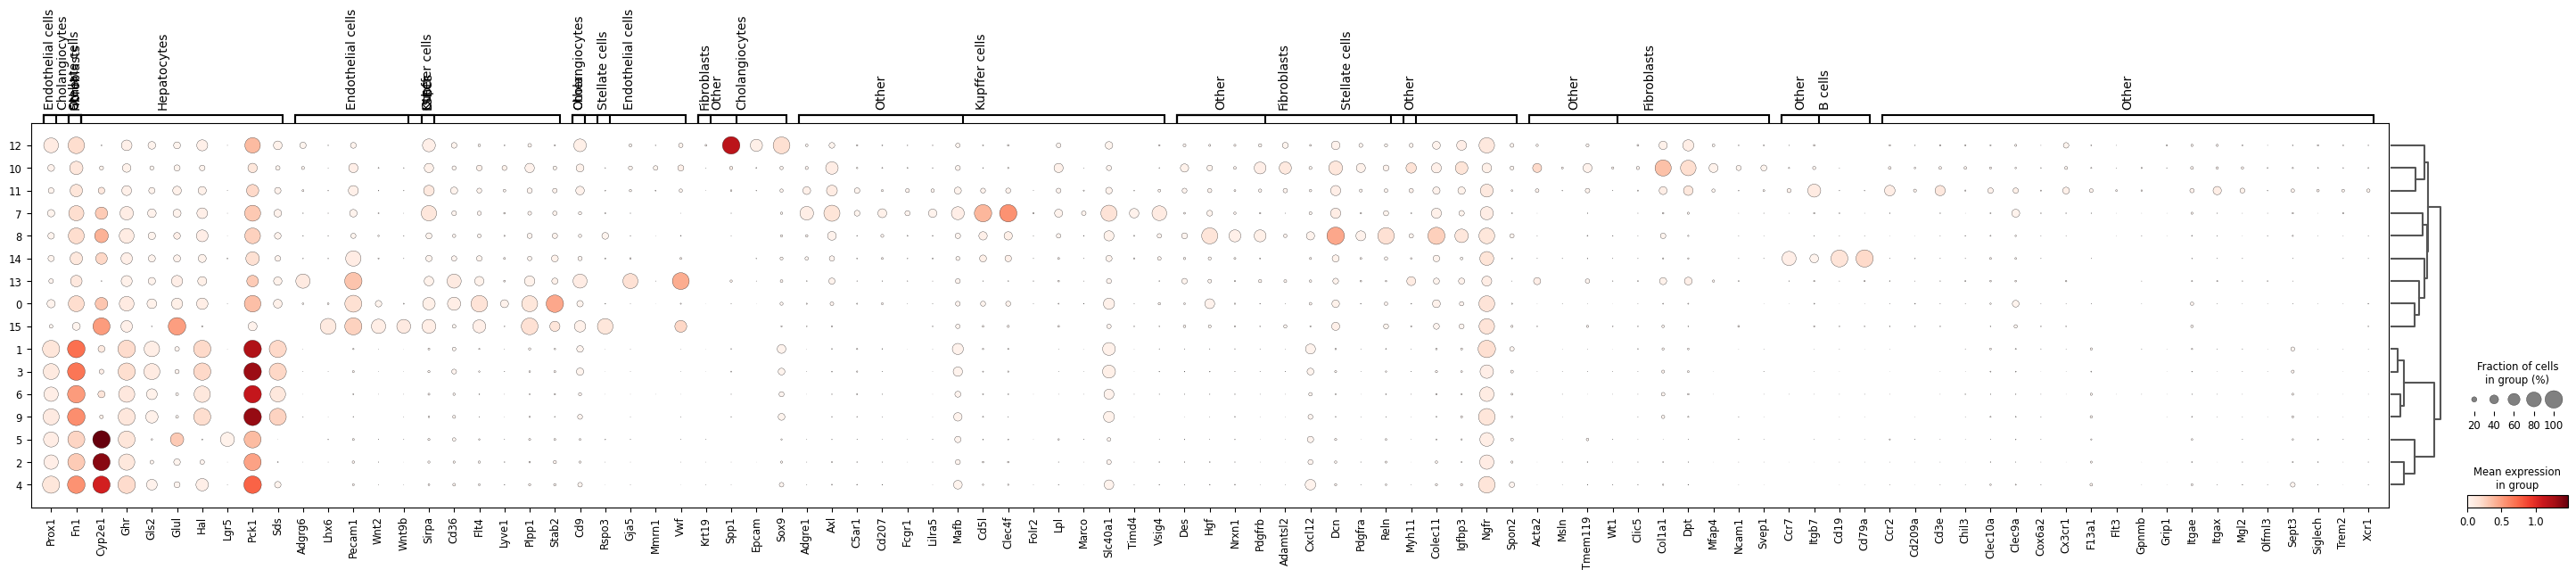

In [13]:
sc.pl.dotplot(sdata.table,useful_markers,groupby='leiden',dendrogram=True,var_group_positions=group_positions,var_group_labels=group_labels)